In [87]:
import os
import requests
import json
import pandas as pd
from pathlib import Path
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [88]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY")
alpaca_secret_key = os.getenv("APCA_API_SECRET")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [89]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2008-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()


tickers = ["TAN"]


timeframe = "1D"

Renewable_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
Renewable_stock_data

TAN                                     
                             open      high       low   close   volume
time                                                                  
2008-08-07 00:00:00-04:00  230.00  232.1000  228.5000  229.10     6624
2008-08-08 00:00:00-04:00  228.90  228.9000  225.0000  225.60     6446
2008-08-11 00:00:00-04:00  219.60  228.4000  219.6000  222.00    14975
2008-08-12 00:00:00-04:00  225.60  231.5000  225.6000  228.10    14852
2008-08-13 00:00:00-04:00  229.30  231.8000  224.2000  230.30     7030
...                           ...       ...       ...     ...      ...
2020-08-03 00:00:00-04:00   45.12   46.1800   44.7120   45.96  1319676
2020-08-04 00:00:00-04:00   47.24   49.1899   47.1000   49.08  1952026
2020-08-05 00:00:00-04:00   49.17   50.8600   48.6900   50.72  1638138
2020-08-06 00:00:00-04:00   50.73   51.2290   49.6200   50.16  1421778
2020-08-07 00:00:00-04:00   50.31   52.0628   50.2901   51.16  1571908

[3022 rows x 5 columns]

In [90]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2008-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()


tickers = ["XLE"]


timeframe = "1D"

Non_Renewable_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
  
# Display sample data
Non_Renewable_stock_data

XLE                                  
                            open    high      low  close    volume
time                                                              
2008-08-07 00:00:00-04:00  73.76  73.970  71.8600  71.89  28910888
2008-08-08 00:00:00-04:00  71.30  71.690  69.7200  71.28  33631235
2008-08-11 00:00:00-04:00  71.69  72.010  69.6600  70.98  31392190
2008-08-12 00:00:00-04:00  71.59  71.840  70.6200  70.74  30657524
2008-08-13 00:00:00-04:00  70.77  73.510  70.7700  73.25  42832058
...                          ...     ...      ...    ...       ...
2020-08-03 00:00:00-04:00  36.02  36.360  35.7200  36.16  30382854
2020-08-04 00:00:00-04:00  36.04  37.120  36.0058  37.04  44438406
2020-08-05 00:00:00-04:00  37.77  37.900  37.0850  37.43  55714505
2020-08-06 00:00:00-04:00  37.22  37.555  36.9900  37.13  37525814
2020-08-07 00:00:00-04:00  36.84  37.270  36.3700  37.18  31673676

[3022 rows x 5 columns]

In [91]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2008-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()


tickers = ["SPY"]


timeframe = "1D"

SP500_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
  
# Display sample data
SP500_stock_data


SPY                                   
                               open    high     low   close     volume
time                                                                  
2008-08-07 00:00:00-04:00  127.9600  128.93  126.54  126.88  210146086
2008-08-08 00:00:00-04:00  126.5900  129.93  126.38  129.62  233649444
2008-08-11 00:00:00-04:00  129.4500  131.51  129.23  130.65  225829560
2008-08-12 00:00:00-04:00  130.2800  130.70  128.73  129.25  196861843
2008-08-13 00:00:00-04:00  128.7800  129.65  127.67  128.82  242746390
...                             ...     ...     ...     ...        ...
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76   71741125
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03   73684427
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06   72846458
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31   76900649
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55   98710236

[3022 rows x 5 columns]

In [103]:
spy_close_price = SP500_stock_data["SPY"]["close"]
xle_close_price = Non_Renewable_stock_data["XLE"]["close"]
tan_close_price = Renewable_stock_data["TAN"]["close"]

In [104]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
Non_Renew_combined_df = pd.concat([spy_close_price, xle_close_price], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
Non_Renew_combined_df.sort_index(inplace=True)

# Display a few rows
Non_Renew_combined_df

,close,close
time,,
2008-08-07 00:00:00-04:00,126.88,71.89
2008-08-08 00:00:00-04:00,129.62,71.28
2008-08-11 00:00:00-04:00,130.65,70.98
2008-08-12 00:00:00-04:00,129.25,70.74
2008-08-13 00:00:00-04:00,128.82,73.25
...,...,...
2020-08-03 00:00:00-04:00,328.76,36.16
2020-08-04 00:00:00-04:00,330.03,37.04
2020-08-05 00:00:00-04:00,332.06,37.43


In [105]:
# Pick XLE and SPY close prices
Non_Renew_combined_df.columns = ['SP500','Non_Renewable']
Non_Renew_combined_df

,SP500,Non_Renewable
time,,
2008-08-07 00:00:00-04:00,126.88,71.89
2008-08-08 00:00:00-04:00,129.62,71.28
2008-08-11 00:00:00-04:00,130.65,70.98
2008-08-12 00:00:00-04:00,129.25,70.74
2008-08-13 00:00:00-04:00,128.82,73.25
...,...,...
2020-08-03 00:00:00-04:00,328.76,36.16
2020-08-04 00:00:00-04:00,330.03,37.04
2020-08-05 00:00:00-04:00,332.06,37.43


In [106]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
Renew_combined_df = pd.concat([spy_close_price, tan_close_price], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
Renew_combined_df.sort_index(inplace=True)

# Display a few rows
Renew_combined_df

,close,close
time,,
2008-08-07 00:00:00-04:00,126.88,229.10
2008-08-08 00:00:00-04:00,129.62,225.60
2008-08-11 00:00:00-04:00,130.65,222.00
2008-08-12 00:00:00-04:00,129.25,228.10
2008-08-13 00:00:00-04:00,128.82,230.30
...,...,...
2020-08-03 00:00:00-04:00,328.76,45.96
2020-08-04 00:00:00-04:00,330.03,49.08
2020-08-05 00:00:00-04:00,332.06,50.72


In [107]:
Renew_combined_df.columns = ['SP500','Renewable']
Renew_combined_df

,SP500,Renewable
time,,
2008-08-07 00:00:00-04:00,126.88,229.10
2008-08-08 00:00:00-04:00,129.62,225.60
2008-08-11 00:00:00-04:00,130.65,222.00
2008-08-12 00:00:00-04:00,129.25,228.10
2008-08-13 00:00:00-04:00,128.82,230.30
...,...,...
2020-08-03 00:00:00-04:00,328.76,45.96
2020-08-04 00:00:00-04:00,330.03,49.08
2020-08-05 00:00:00-04:00,332.06,50.72


In [109]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
Non_Renew_daily_returns = Non_Renew_combined_df.pct_change()
Non_Renew_daily_returns

,SP500,Non_Renewable
time,,
2008-08-07 00:00:00-04:00,NaN,NaN
2008-08-08 00:00:00-04:00,0.021595,-0.008485
2008-08-11 00:00:00-04:00,0.007946,-0.004209
2008-08-12 00:00:00-04:00,-0.010716,-0.003381
2008-08-13 00:00:00-04:00,-0.003327,0.035482
...,...,...
2020-08-03 00:00:00-04:00,0.006768,0.003330
2020-08-04 00:00:00-04:00,0.003863,0.024336
2020-08-05 00:00:00-04:00,0.006151,0.010529


In [112]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
Renew_daily_returns = Renew_combined_df.pct_change()
Renew_daily_returns

,SP500,Renewable
time,,
2008-08-07 00:00:00-04:00,NaN,NaN
2008-08-08 00:00:00-04:00,0.021595,-0.015277
2008-08-11 00:00:00-04:00,0.007946,-0.015957
2008-08-12 00:00:00-04:00,-0.010716,0.027477
2008-08-13 00:00:00-04:00,-0.003327,0.009645
...,...,...
2020-08-03 00:00:00-04:00,0.006768,0.019973
2020-08-04 00:00:00-04:00,0.003863,0.067885
2020-08-05 00:00:00-04:00,0.006151,0.033415


In [136]:
# Calculate covariance and variance of all daily returns of Non-Renewable vs. SP500
Non_Renew_covariance = Non_Renew_daily_returns['Non_Renewable'].cov(Non_Renew_daily_returns['SP500'])
Non_Renew_covariance
Non_Renew_variance = Non_Renew_daily_returns['Non_Renewable'].var()
Non_Renew_variance
Non_Renew_beta = Non_Renew_covariance / Non_Renew_variance
Non_Renew_beta

0.5539633758326447

In [135]:
# Calculate covariance of all daily returns of MSFT vs. AAPL
Renew_covariance = Renew_daily_returns['Renewable'].cov(Renew_daily_returns['SP500'])
Renew_covariance
Renew_variance = Renew_daily_returns['Renewable'].var()
Renew_variance
Renew_beta = Renew_covariance / Renew_variance
Renew_beta

0.3160307377895328

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Renewable Returns vs. S&P 500 Returns'}, xlabel='time'>

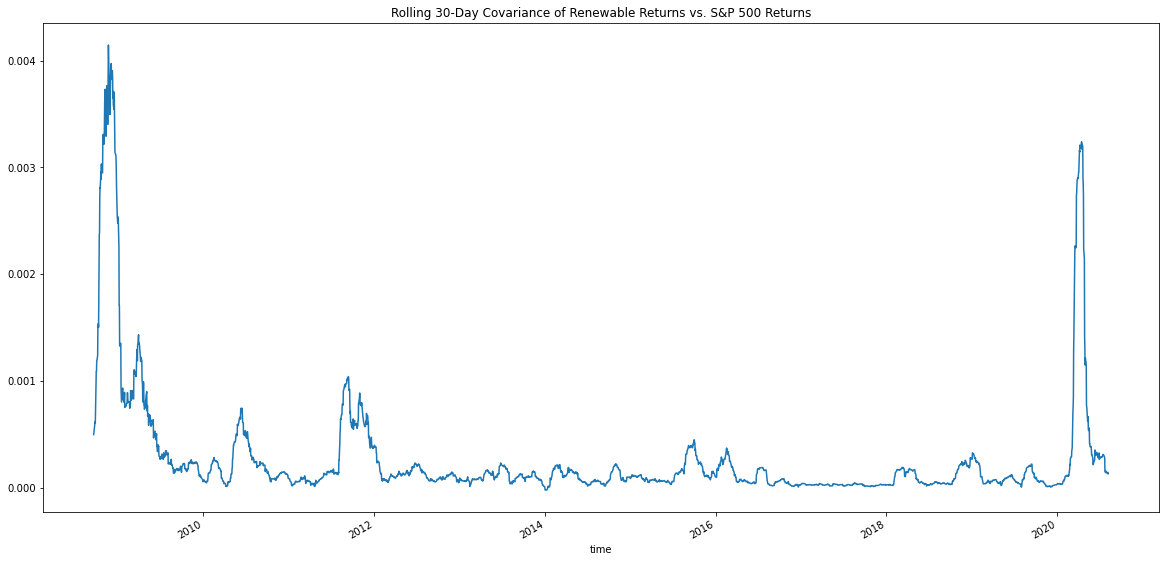

In [137]:
# Calculate 30-day rolling covariance of Renewable vs. S&P 500 and plot the data
rolling_Renew_covariance = Renew_daily_returns['Renewable'].rolling(window=30).cov(Renew_daily_returns['SP500'])
rolling_Renew_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Renewable Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Non_enewable Returns vs. S&P 500 Returns'}, xlabel='time'>

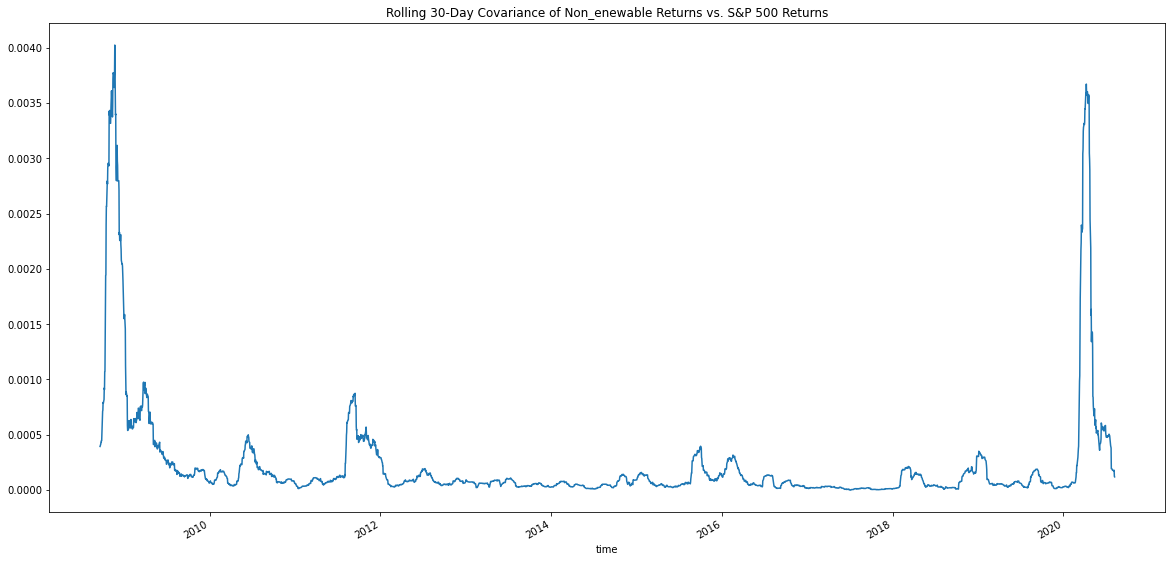

In [144]:
# Calculate 30-day rolling covariance of Renewable vs. S&P 500 and plot the data
rolling_Non_Renew_covariance = Non_Renew_daily_returns['Non_Renewable'].rolling(window=30).cov(Non_Renew_daily_returns['SP500'])
rolling_Non_Renew_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Non_enewable Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='time'>

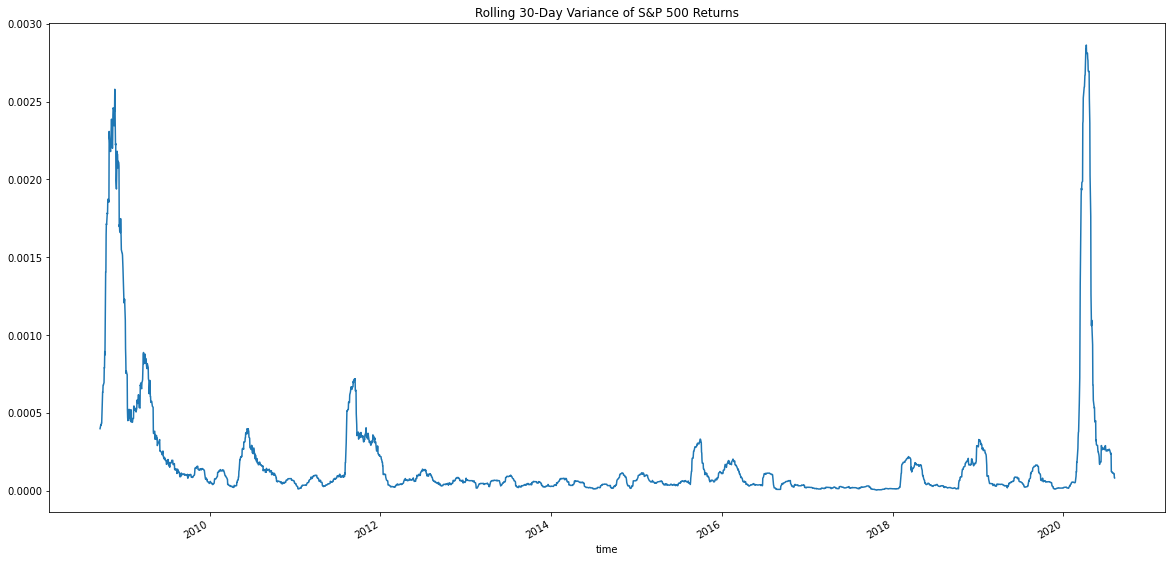

In [145]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_Non_Renew_variance = Non_Renew_daily_returns['SP500'].rolling(window=30).var()
rolling_Non_Renew_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

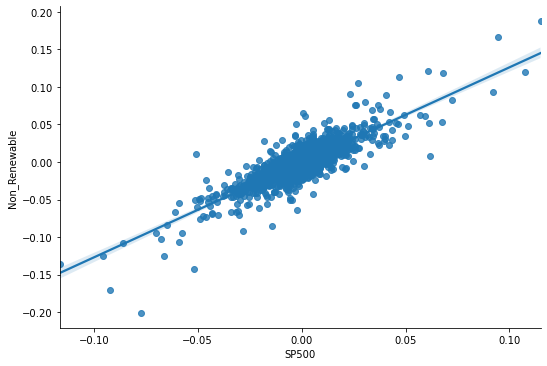

In [147]:

sns.lmplot(x='SP500', y='Non_Renewable', data=Non_Renew_daily_returns, aspect=1.5, fit_reg=True)

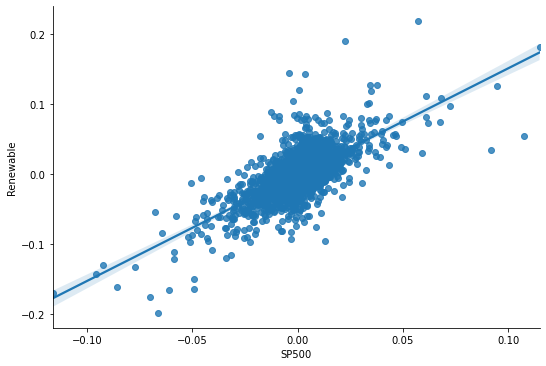

In [149]:

sns.lmplot(x='SP500', y='Renewable', data=Renew_daily_returns, aspect=1.5, fit_reg=True)